In [1]:
#setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#load in some data
quarcs_data=pd.read_csv('QuaRCS_Pre_forAST200_anonymized.csv', encoding="ISO-8859-1")
mask = np.where(quarcs_data == 999)
quarcs_data = quarcs_data.replace(999,np.nan) 
exop_data=pd.read_csv('planets032717.csv', skiprows=73)

# Binning - Basic Ideas

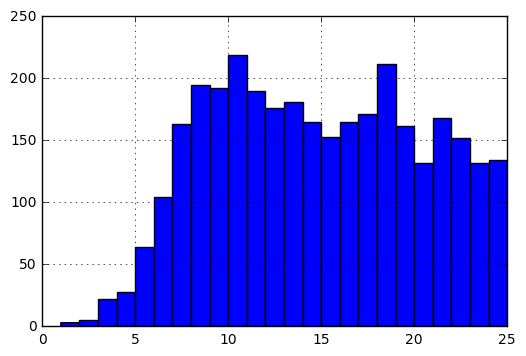

In [3]:
quarcs_data["PRE_SCORE"].hist(bins=24) 

## Downsampling Data

For coarser view

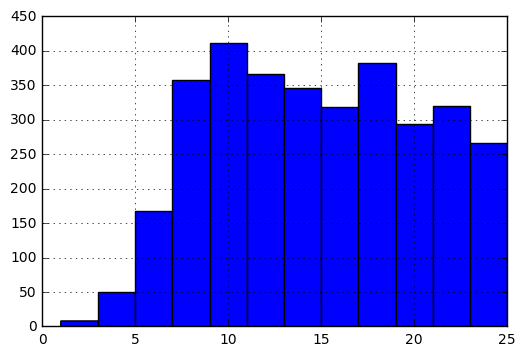

In [4]:
quarcs_data["PRE_SCORE"].hist(bins=12) 

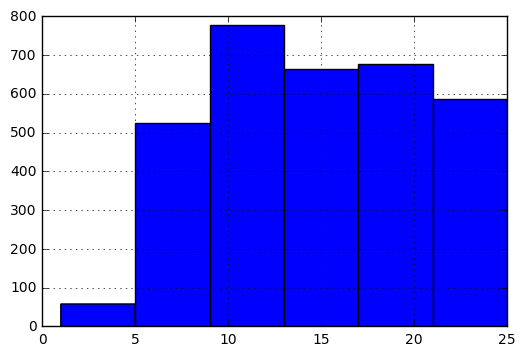

In [5]:
quarcs_data["PRE_SCORE"].hist(bins=6) 

## Upsampling data - only makes sense if there's more information

If your data have discrete values, at best you'll end up with empty bins. 

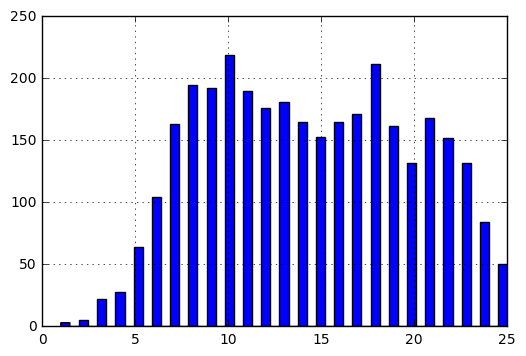

In [6]:
quarcs_data["PRE_SCORE"].hist(bins=49) 

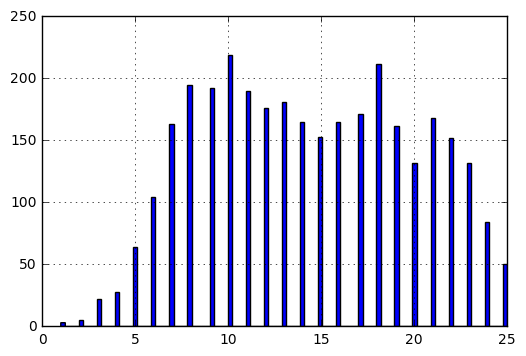

In [7]:
quarcs_data["PRE_SCORE"].hist(bins=99) 

## Case Study - Continuous Variable

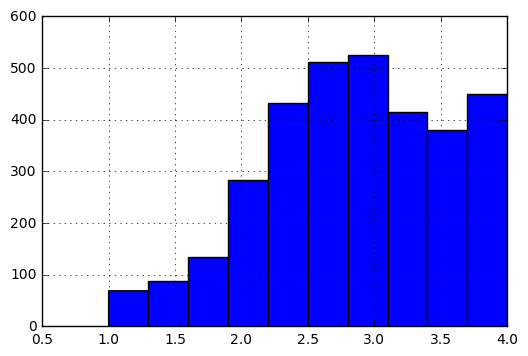

In [8]:
#print(*quarcs_data.columns)

quarcs_data["CF_Mean"].hist(bins=10)

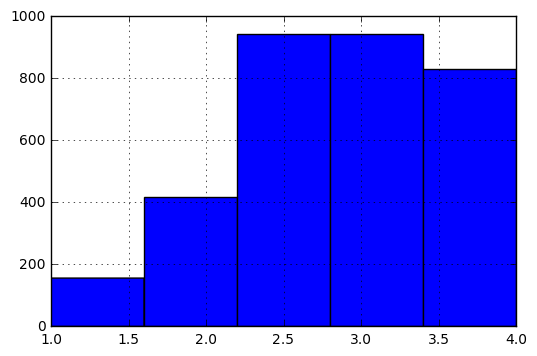

In [9]:
quarcs_data["CF_Mean"].hist(bins=5)

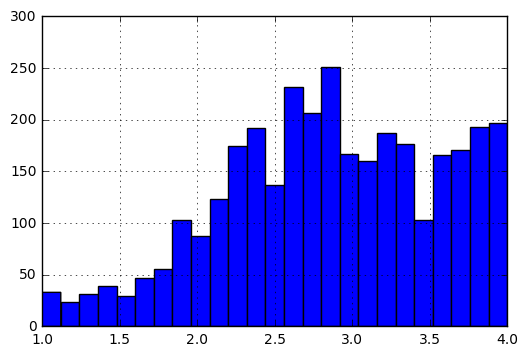

In [10]:
quarcs_data["CF_Mean"].hist(bins=25)

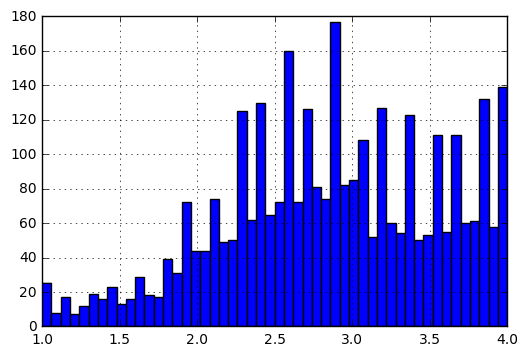

In [11]:
quarcs_data["CF_Mean"].hist(bins=50)

# Binning - Practicalities

For all of the plots we made so far, we allowed python to define the boundaries of the bins, but this "automatic binning" can be very problematic, as several of the previous plots will reveal if we look at them closely. 

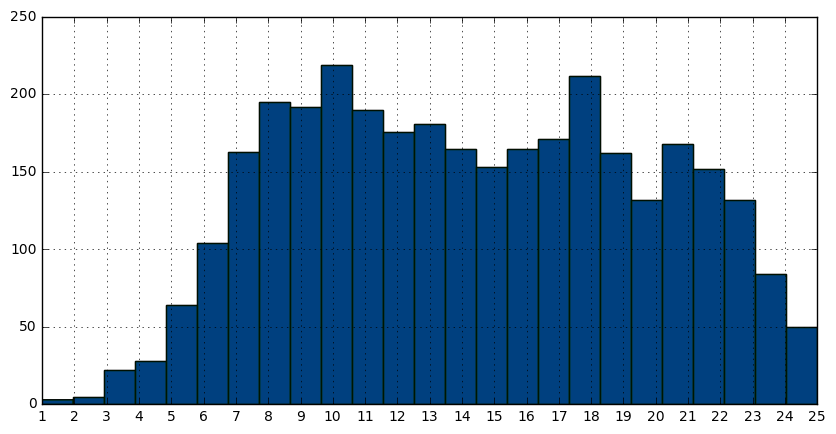

In [12]:
#auto binning (max - min)/nbins
quarcs_data["PRE_SCORE"].hist(bins=25, figsize=(10,5)) 
ticks=np.arange(0,26,1)
plt.xticks(ticks)

#ovserplot hard-coded bins to check
bin_def = np.arange(1,25.9,24/25)
quarcs_data["PRE_SCORE"].hist(bins=bin_def, figsize=(10,5),alpha=0.5)

### Tip 1 - when setting number of bins, make sure you understand where boundaries between them end up (e.g. by carefully examining graph)

Here we've naively specified 25 bins since there are 25 possible points. Since the minimum score is 1 for this dataset (it didn't have to be - 0 is actually the minimum possible score) and the maximum is 25, each bin has a width of (25 - 1)/25 or 24/25 = 0.96.

This causes some weirdness at the upper end of the plot, which you can see when you compare it to the same plot with bins separated by 1 point instead of 0.96 points. 

([<matplotlib.axis.XTick at 0x119c50780>,
 <a list of 26 Text xticklabel objects>)

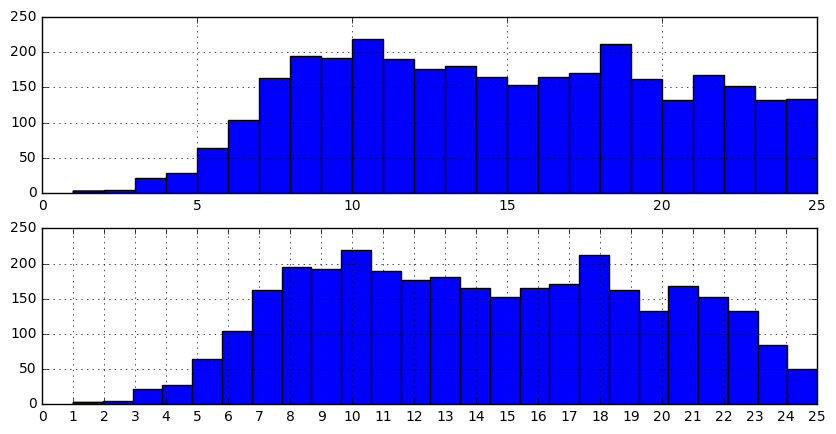

In [13]:
#side by side
plt.subplots(2,1, figsize=(10,5))
plt.subplot(211)
quarcs_data["PRE_SCORE"].hist(bins=24) 
plt.subplot(212)
quarcs_data["PRE_SCORE"].hist(bins=25) 
ticks=np.arange(0,26,1)
plt.xticks(ticks)

### Are bin boundaries exclusive or inclusive?

We might assume bin boundaries right at the integer values make the most sense BUT if you think about it, that is also confusing. Is a score with that value in the bin on the right or the left? Much more sense would be bins that are symmetric around the integer scores. These you must hard code generally, since the automatic binning will always start and end at the minimum and maximum values of the variable and will not go beyond them (so that the minimum value appears in the middle of a bin rather than at its edge)

In [14]:
#better = user-defined bins
bin_def = np.arange(-0.5,26.5,1)
print(bin_def)

[ -0.5   0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5
  11.5  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5
  23.5  24.5  25.5]


([<matplotlib.axis.XTick at 0x11a0f9ef0>,
 <a list of 26 Text xticklabel objects>)

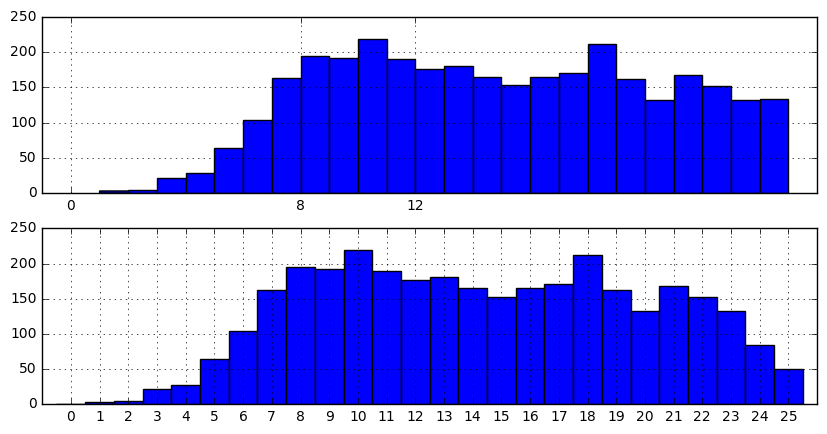

In [15]:
plt.subplots(2,1, figsize=(10,5))
plt.subplot(211)
quarcs_data["PRE_SCORE"].hist(bins=24)
plt.xlim(-1,26)
#ticks=np.arange(0,26,1)
ticks=[0,8,12]
plt.xticks(ticks)
plt.subplot(212)
quarcs_data["PRE_SCORE"].hist(bins=bin_def)
plt.xlim(-1,26)
ticks=np.arange(0,26,1)
plt.xticks(ticks)


This shows us that although the bin size (1 point) makes more sense when we specify bins=24, a bin defined between 24 and 25 will only include score=24, and not score =25, so the last set of scores gets left off. 

### Other problems with autobinning

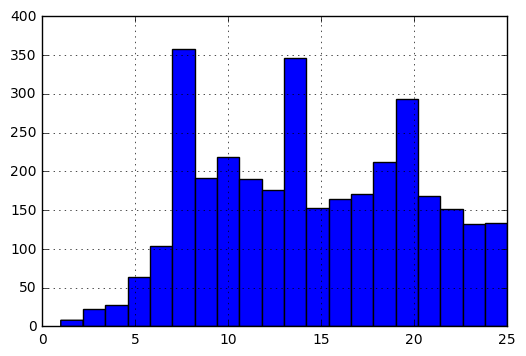

In [16]:
quarcs_data["PRE_SCORE"].hist(bins=20)

naively choosing some number of bins is also problematic because one bin may include more than one of the discrete allowed values, as here. The bins around 7, 13 and 19 include TWO possible scores (7/8, 13/14 and 19/20, and all other bins include only 1). 

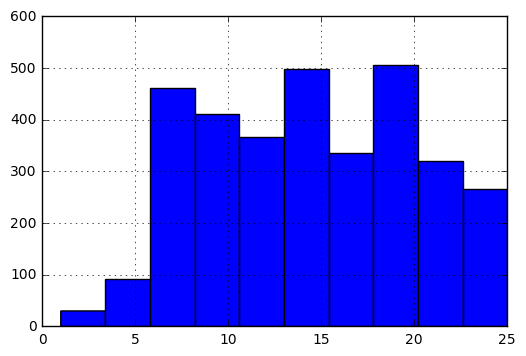

In [17]:
quarcs_data["PRE_SCORE"].hist(bins=10)

### So what if we want to downsample effectively?

Again, define bins that make sense by hand, where each includes the same integer number of possible scores (of course, this gets complicated when the number of possibilities/n bins is not itself an integer value. For example, binning total score by 2 leaves one of the 25 possible scores an "odd man out" since 25/2 is not an integer. In this case, we'll define the lowest bin as a score of 0 or 1, since 0 was technically allowed

[ -0.5   1.5   3.5   5.5   7.5   9.5  11.5  13.5  15.5  17.5  19.5  21.5
  23.5  25.5]


(-0.5, 25.5)

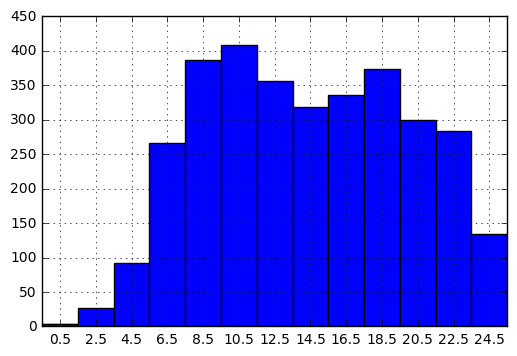

In [18]:
bin_def2=np.arange(0,28,2)-0.5 
print(bin_def2)
quarcs_data["PRE_SCORE"].hist(bins=bin_def2)
plt.xticks(bin_def2+1)
plt.xlim(-0.5,25.5)

(0, 25)

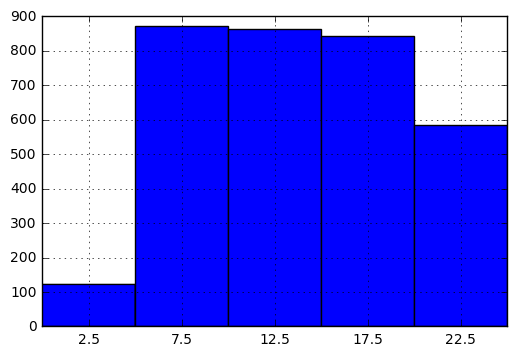

In [19]:
#bin by five
#another trick = offset upper bound by a tiny amount so that it includes the upper score in the bin (5,10,15,20,25)
bin_def3=[0,5.001,10.001,15.001,20.001,25.001]
ticks=[2.5,7.5,12.5,17.5,22.5]

quarcs_data["PRE_SCORE"].hist(bins=bin_def3)
plt.xticks(ticks)
plt.xlim(0,25)

For continuous variables, we don't have to be quite as careful, but there is a limit in that not all continuous variables are equally continuous. Many "continuous" variables were at some point calculated from discrete variables, which means there's a limitation to how many values they can take on. You can see this when you get high enough in bins for the average confidence rankings 


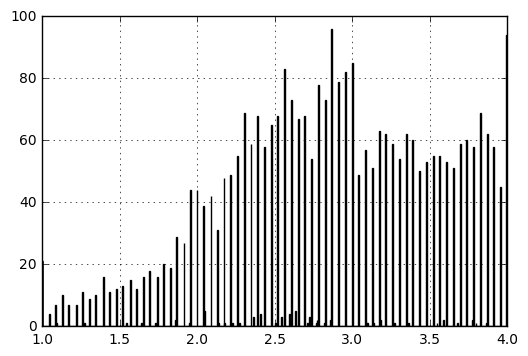

In [20]:
quarcs_data["CF_Mean"].hist(bins=500)

### Side Note: Binning in 2-Dimensions

In [21]:
from astropy.io import fits

In [22]:
def rebin( a, newshape ):
        '''Rebin an array to an arbitrary new shape.
        '''
        assert len(a.shape) == len(newshape)

        slices = [ slice(0,old, float(old)/new) for old,new in zip(a.shape,newshape) ]
        coordinates = np.mgrid[slices]
        indices = coordinates.astype('i')   #choose the biggest smaller integer index
        return a[tuple(indices)]

In [23]:
def rebin_factor( a, newshape ):
        '''Rebin an array to a new shape.
        newshape must be a factor of a.shape.
        '''
        assert len(a.shape) == len(newshape)
        assert not sometrue(mod( a.shape, newshape ))

        slices = [ slice(None,None, old/new) for old,new in zip(a.shape,newshape) ]
        return a[slices]

In [24]:
def rebin_simple(a, newshape):
        assert len(a.shape) == len(newshape)
        assert not sometrue(mod( a.shape, newshape ))

In [25]:
im = fits.getdata('DSS_M51_15arcminsq.fits')

(530, 530)


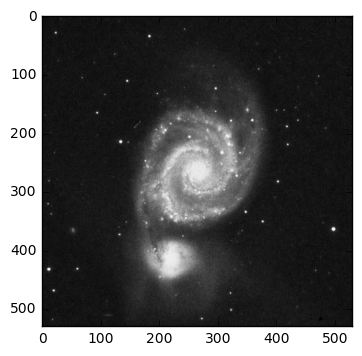

In [26]:
plt.imshow(im, cmap='gray')
print(im.shape)

In [27]:
im_rebin=rebin(im, (13.2,13.2))

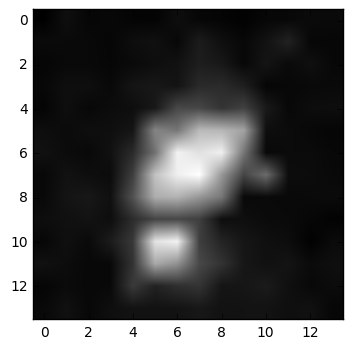

In [28]:
plt.imshow(im_rebin, cmap='gray')